# Probability Simulation - 3Blue1Brown Episode 

Solving the first question from 3b1b's [last lecture (03:30)][^1]  

If x,y are random on [0,1], what's the probability ⌊x/y⌋ is even?

Comparing basic Python vs numpy approach for speed.

[^1]: https://www.youtube.com/watch?v=QvuQH4_05LI&list=PLZHQObOWTQDP5CVelJJ1bNDouqrAhVPev&index=12&t=210s



In [8]:
from timeit import timeit

import matplotlib.pyplot as plt
import numpy as np

In [9]:
def stupid_slow(size) -> float:
    """x, y chosen at random from uniform distribution of range[0, 1]
    find probability of rounded down ratio x over y to be an even num
    """
    even_count = 0
    for _ in range(size):
        numerator = np.random.random()
        denominator = np.random.random()
        if not numerator // denominator % 2:
            even_count += 1
    return even_count / size

In [10]:
def np_saves_ass(size) -> float:
    """same but fully with numpy"""
    ratios = np.floor(np.random.random(size) / np.random.random(size))
    even_count = (ratios % 2 == 0).mean()
    return even_count

In [11]:
loops = 10  # how many times to run. 100 may take 2-5min.
size = 10**6  # array size

In [12]:
stupid_time = timeit("stupid_slow(size)", number=loops, globals=globals())
np_time = timeit("np_saves_ass(size)", number=loops, globals=globals())

In [13]:
print(f"stupid_slow()  takes on average: {stupid_time/loops:.3f} sec")
print(f"np_saves_ass() takes on average: {np_time/loops:.3f} sec")
print(f"numpy ~{stupid_time//np_time:n} times faster ;)")

stupid_slow()  takes on average: 0.989 sec
np_saves_ass() takes on average: 0.037 sec
numpy ~26 times faster ;)


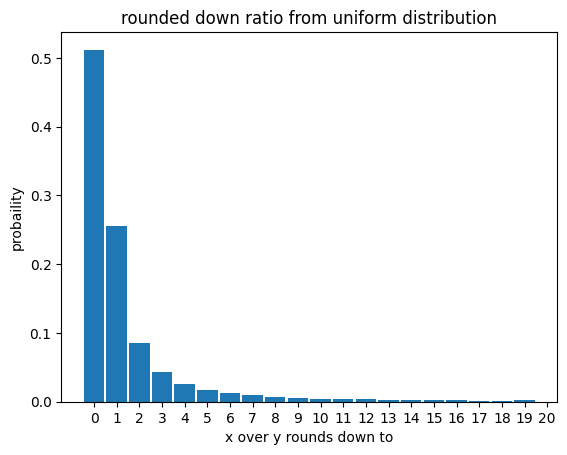

In [14]:
# another question from the video. not related to measuring speeds

ratios = np.floor(np.random.random(size) / np.random.random(size))
plt.hist(ratios, range=(0, 20), bins=20, rwidth=0.9, align="left", density=True)
plt.xticks(np.arange(0, 21, 1))
plt.title("rounded down ratio from uniform distribution")
plt.xlabel("x over y rounds down to")
plt.ylabel("probaility")
plt.show()